## Main Result:

For the polyptych with core given by a rectangle of side lengths $n$ and $m$, so

$$ \Delta = \text{Conv}\left( (0,0),\, (n,0),\, (0,m)\, (n,m) \right), $$

its Euler characteristic is (apparently)

$$ \chi\left( M_{a-\text{cut}}; \mathcal{L}_{a\text{-cut}}^{k}\right) = \chi\left(\mathbb{CP}^{2}; \mathcal{O}(a)\right)\, \cdot\, \left(\frac{a^{2}}{3} + \frac{2an}{3} + \frac{2am}{3} + a + nm + m + n + 1\right). $$ 

In [1]:
from sympy import *
from sympy.vector import Vector
from sympy.vector import CoordSys3D
N = CoordSys3D('N')

t, n, m, a = symbols( 't n m a' )
init_printing(use_unicode=True)

# Basis for the edge/weight vectors for the points 

v1 = N.i
v2 = N.j

# Define a vector which is not parallel to any edge vector (non-degeneracy), which will eventually be sent to zero:

Phi = t*(v1 + 2*v2)

# Set the fixed points of the action; P belong to the interior,
# and Q to the exterior:

# Interior points:

def P12(n,m,a):
    return Vector.zero

def P23(n,m,a):
    return n*v1

def P34(n,m,a):
    return n*v1 + m*v2

def P14(n,m,a):
    return m*v2

# Exterior points:

def Q12_1(n,m,a):
    return -a*v2

def Q12_2(n,m,a):
    return -a*v1

def Q23_2(n,m,a):
    return (n+a)*v1

def Q23_3(n,m,a):
    return n*v1 - a*v2

def Q34_3(n,m,a):
    return n*v1 + (m+a)*v2

def Q34_4(n,m,a):
    return (n+a)*v1 + m*v2

def Q14_1(n,m,a):
    return (m+a)*v2

def Q14_4(n,m,a):
    return -a*v1 + m*v2

# Function for the contribution from each fixed-point:

def f(P, edge1, edge2):
    return exp( Phi.dot(P) ) / ( (1 - exp( Phi.dot(edge1) ) ) * ( 1 - exp( Phi.dot(edge2) ) ) )

def g(P, edge1, edge2, edge3, edge4):
    return exp( Phi.dot(P) ) / ( (1 - exp( Phi.dot(edge1) ) ) * ( 1 - exp( Phi.dot(edge2) ) ) * ( 1 - exp( Phi.dot(edge3) ) ) * ( 1 - exp( Phi.dot(edge4) ) ) )

# For each of the right-angled triangles:
# Delta34 is the bottom-left simplex:

def Delta34(n,m,a):
    return f( P12(n,m,a), v1, v2 ) * ( f( Vector.zero, -v1, -v2 ) + f( -a*v1, v1, v1 - v2 ) + f( -a*v2, v2, -v1 + v2 ) )

# Delta14 is the bottom-right simplex:

def Delta14(n,m,a):
    return f( P23(n,m,a), -v1, v2 ) * ( f( Vector.zero, v1, -v2 ) + f( a*v1, -v1, -v1 - v2 ) + f( -a*v2, v1 + v2, v2 ) )

# Delta12 is the top-right simplex:

def Delta12(n,m,a):
    return f( P34(n,m,a), -v1 , -v2 ) * ( f( Vector.zero, v1, v2 ) + f( a*v1, -v1 + v2, -v1 ) + f( a*v2, v1 - v2, -v2 ) )

# Delta23 is the top-left simplex:

def Delta23(n,m,a):
    return f( P14(n,m,a), v1 , -v2 ) * ( f( Vector.zero, v2, -v1 ) + f( -a*v1, v1, v1 + v2 ) + f( a*v2, -v1 - v2, -v2 ) )

# And their sum:

def Sum(n,m,a):
    return Delta34(n,m,a) + Delta14(n,m,a) + Delta12(n,m,a) + Delta23(n,m,a)

# Take the limit as t -> 0 to get the Euler characteristic(?):

def SumLimit(n,m,a):
    return limit(Sum(n,m,a),t,0)

In [31]:
# Delta34(n,m,a) # The bottom-left simplex

In [32]:
# Delta14(n,m,a) # The bottom-right simplex

In [33]:
# Delta12(n,m,a) # The top-right simplex

In [34]:
# Delta23(n,m,a) # The top-left simplex

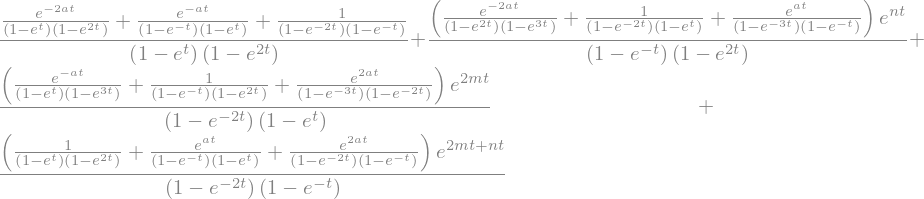

In [2]:
Sum(n,m,a) # Take their sum

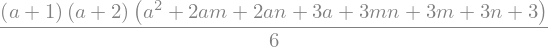

In [3]:
factor(SumLimit(n,m,a)) # And let ϕ tend to zero

In [4]:
def Euler(n,m,a):
    return factor(Rational(1,6) * ( (a+1)*(a+2) * (a**2 + a*(2*m + 2*n + 3) + 3*(m*n + m + n + 1)) ))

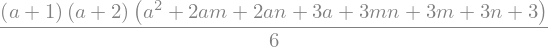

In [5]:
Euler(m,n,a)

In [6]:
def RemoveCP2s(n,m,a):
    return simplify(Euler(m,n,a) * ( 2 / ( (a+1)*(a+2) ) ))

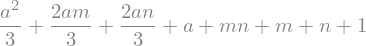

In [7]:
RemoveCP2s(n,m,a) # Removes the (a+1)(a+2)/2 factor